<a href="https://colab.research.google.com/github/tmy-datamesa/airbnb/blob/main/airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
pd.set_option('display.max_columns', None)

columns = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules']

df = pd.read_csv("/content/Airbnb_Open_Data.csv", usecols = columns)

In [5]:
df.columns = [col.lower().replace(" ","_") for col in df.columns]
df.head(3)

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            102349 non-null  object 
 1   host_id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country_code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room_type       

In [7]:
percentage_result = df.isnull().sum() / df.shape[0] * 100

percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,name,0.243667
1,host_id,0.000000
2,host_identity_verified,0.281679
3,host_name,0.395715
4,neighbourhood_group,0.028265
5,neighbourhood,0.015595
6,lat,0.007797
7,long,0.007797
8,country,0.518524
9,country_code,0.127682


In [8]:
df.describe()

,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [9]:
df["host_id"].unique().shape[0]/df["host_id"].shape[0] * 100

99.47172974395461

In [ ]:
df.drop(columns = ["host_id"], inplace = True)

In [14]:
df["host_identity_verified"].value_counts()

,count
host_identity_verified,
unconfirmed,51200
verified,51110


In [15]:
df["host_name"].value_counts()

,count
host_name,
Michael,881
David,764
John,581
Alex,546
Sonder (NYC),516
...,...
Ujunwa,1
Richard Nelson,1
Omri-Dan,1


In [16]:
total_unique_values = df["host_name"].unique().shape[0]
print(f"Total unique values:           {total_unique_values}")
print(f"% of unique values to overall: {round(total_unique_values/df['host_name'].shape[0] * 100, 2)}%")

Total unique values:           13191
% of unique values to overall: 12.86%


In [17]:
df["neighbourhood_group"].value_counts()

,count
neighbourhood_group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


In [18]:
df["neighbourhood"].value_counts()

,count
neighbourhood,
Bedford-Stuyvesant,7937
Williamsburg,7775
Harlem,5466
Bushwick,4982
Hell's Kitchen,3965
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


In [19]:
total_unique_values = df["neighbourhood"].unique().shape[0]
print(f"Total unique values:           {total_unique_values}")
print(f"% of unique values to overall: {round(total_unique_values/df['neighbourhood'].shape[0] * 100, 2)}%")

Total unique values:           225
% of unique values to overall: 0.22%


In [21]:
df["lat"].describe()

,lat
count,102591.000000
mean,40.728094
std,0.055857
min,40.499790
25%,40.688740
50%,40.722290
75%,40.762760
max,40.916970


In [22]:
df["long"].describe()

,long
count,102591.000000
mean,-73.949644
std,0.049521
min,-74.249840
25%,-73.982580
50%,-73.954440
75%,-73.932350
max,-73.705220


In [23]:
df["country_code"].value_counts()

,count
country_code,
US,102468


In [24]:
df["country"].value_counts()

,count
country,
United States,102067


In [ ]:
df.drop(columns = ["country_code", "country"], axis = 1, inplace = True)

In [27]:
df["instant_bookable"].value_counts()

,count
instant_bookable,
False,51474
True,51020


In [28]:
df["cancellation_policy"].value_counts()

,count
cancellation_policy,
moderate,34343
strict,34106
flexible,34074


In [29]:
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


In [30]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$", "").replace(",", "").replace(" ", ""))

df["price"] = df["price"].apply(lambda x: remove_dollar_sign(x))

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [31]:
df["service_fee"] = df["service_fee"].apply(lambda x: remove_dollar_sign(x))

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [32]:
df["minimum_nights"] = np.array(df["minimum_nights"], dtype = np.int16)

/usr/local/lib/python3.12/dist-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [33]:
df["number_of_reviews"] = np.array(df["number_of_reviews"], dtype = np.int16)

In [34]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [35]:
df["reviews_per_month"].describe()

,reviews_per_month
count,86720.000000
mean,1.374022
std,1.746621
min,0.010000
25%,0.220000
50%,0.740000
75%,2.000000
max,90.000000


In [36]:
df["review_rate_number"].value_counts()

,count
review_rate_number,
5.0,23369
4.0,23329
3.0,23265
2.0,23098
1.0,9212


In [37]:
df["review_rate_number"] = np.array(df["review_rate_number"], dtype=np.int8)

/usr/local/lib/python3.12/dist-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [38]:
df["calculated_host_listings_count"].value_counts().keys()

Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,  10.0,
       327.0,  12.0,  96.0,  11.0,  13.0, 232.0,  33.0, 121.0, 208.0,  14.0,
        23.0,  17.0,  91.0,  87.0,  34.0,  52.0,  49.0,  50.0, 186.0, 103.0,
        18.0,  65.0,  15.0, 161.0,  28.0, 102.0,  31.0,  19.0,  20.0, 108.0,
        25.0,  47.0,  30.0,  37.0,  53.0,  26.0,  43.0,  48.0,  32.0,  16.0,
       171.0,  66.0,  83.0, 152.0,  24.0,  56.0, 126.0,  39.0,  27.0,  51.0,
        54.0,  21.0,  62.0,  44.0, 332.0,  59.0,  29.0, 125.0, 218.0,  45.0,
        67.0,  58.0,  63.0,  86.0,  22.0,  55.0,  46.0,  80.0],
      dtype='float64', name='calculated_host_listings_count')

In [39]:
df["calculated_host_listings_count"] = np.array(df["calculated_host_listings_count"], dtype = np.int16)

/tmp/ipython-input-1796022289.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column_name, order=df[column_name].value_counts().index[:top_values], palette=palette)


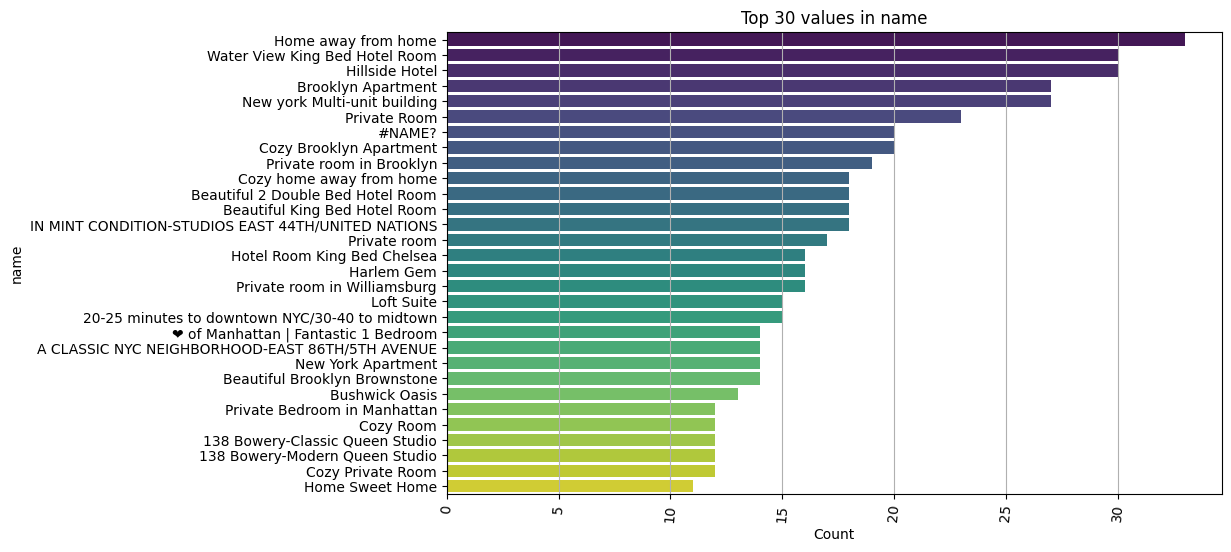

In [45]:
plot_bar_chart(column_name = "name", top_values = 30, show_grid = True, angle = 85)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart(column_name, top_values, palette="viridis", show_grid=False, angle=0):
    """
    Plots a bar chart of the value counts for a given column.

    Args:
        column_name (str): The name of the column to plot.
        top_values (int): The number of top values to display.
        palette (str, optional): The color palette to use. Defaults to "viridis".
        show_grid (bool, optional): Whether to show a grid. Defaults to False.
        angle (int, optional): The rotation angle for x-axis labels. Defaults to 0.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column_name, order=df[column_name].value_counts().index[:top_values], palette=palette, hue=None, legend=False)
    plt.title(f'Top {top_values} values in {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    if show_grid:
        plt.grid(axis='x')
    if angle > 0:
        plt.xticks(rotation=angle)
    plt.show()